# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [19]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file = 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [21]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results


n_train = X_train.shape[0]

n_test = X_test.shape[0]

n_valid = X_valid.shape[0]
# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)

print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

3


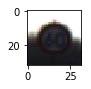

In [22]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index]
plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [23]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
from datetime import datetime
import copy
import tensorflow as tf
import tensorflow.contrib.slim as slim
import re
import time
import numpy as np
import os.path


X_train, y_train = shuffle(X_train, y_train)

images = X_train
labels = y_train
print(X_train.shape)

(34799, 32, 32, 3)


### Model Architecture

In [84]:


NUM_CLASSES = 43
NUM_EXAMPLES_PER_EPOCH_FOR_TRAIN = n_train
NUM_EXAMPLES_PER_EPOCH_FOR_EVAL = n_test

EPOCHS = 38
BATCH_SIZE = 128

# Constants describing the training process.
MOVING_AVERAGE_DECAY = 0.9999     # The decay to use for the moving average.
NUM_EPOCHS_PER_DECAY = 30.0      # Epochs after which learning rate decays.
LEARNING_RATE_DECAY_FACTOR = 0.01  # Learning rate decay factor.
INITIAL_LEARNING_RATE = 0.001       # Initial learning rate.

NUM_GPUS = 4
TOWER_NAME = 'tower'

log_device_placement = True
train_dir = '/tmp/traffic_sign'
num_examples = n_train


In [74]:
def lenet(images, num_classes=NUM_CLASSES, 
          is_training=False,
          dropout_keep_prob=0.5,
          weight_decay=0.1,
          prediction_fn=slim.softmax,
          scope=''):

    with tf.name_scope(scope, 'LeNet', [images]) as sc:
        end_points_collection = scope + '_end_points'
        
        with slim.arg_scope(
        [slim.conv2d, slim.fully_connected],
        weights_regularizer=slim.l2_regularizer(weight_decay),
        weights_initializer=tf.truncated_normal_initializer(stddev=0.1),
        activation_fn=tf.nn.relu,
        outputs_collections=[end_points_collection]):
            net = slim.conv2d(images, 6, [5, 5], scope='conv1')
            net = slim.max_pool2d(net, [2, 2], 2, scope='pool1')
            net = slim.conv2d(net, 16, [5, 5], scope='conv2')
            net = slim.max_pool2d(net, [2, 2], 2, scope='pool2')
            net = slim.flatten(net)
            #end_points['Flatten'] = net
            
            net = slim.fully_connected(net, 120, scope='fc1')
            #net = slim.dropout(net, dropout_keep_prob, is_training=is_training, scope='dropout1')

            net = slim.fully_connected(net, 84, scope='fc2')
            #net = slim.dropout(net, dropout_keep_prob, is_training=is_training, scope='dropout2')
            logits = slim.fully_connected(net, num_classes, activation_fn=None,
                                      scope='fc3')
            
            end_points = slim.utils.convert_collection_to_dict(end_points_collection)
            end_points['Logits'] = logits
            end_points['Predictions'] = prediction_fn(logits, scope='Predictions')

            return logits, end_points

In [71]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten

def LeNet(x):
    mu = 0
    sigma = 0.1
    conv1_W_initializer = tf.contrib.layers.variance_scaling_initializer(factor=2.0, mode='FAN_IN', uniform=False)
    conv1_W = tf.Variable(conv1_W_initializer(shape=(5, 5, 3, 6)))
    tf.add_to_collection(tf.GraphKeys.WEIGHTS, conv1_W)
    #conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1,1,1,1], padding='VALID') + conv1_b
    
    conv1 = tf.nn.relu(conv1)
    
    conv1 = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    conv2_W_initializer = tf.contrib.layers.variance_scaling_initializer(factor=2.0, mode='FAN_IN', uniform=False)
    conv2_W = tf.Variable(conv2_W_initializer(shape=(5, 5, 6, 16)))
    tf.add_to_collection(tf.GraphKeys.WEIGHTS, conv2_W)
    #conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1,1,1,1], padding='VALID') + conv2_b
    
    conv2 = tf.nn.relu(conv2)
    
    conv2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    fc0 = flatten(conv2)
    
    fc1_W_initializer = tf.contrib.layers.variance_scaling_initializer(factor=2.0, mode='FAN_IN', uniform=False)
    fc1_W = tf.Variable(fc1_W_initializer(shape=(400, 120)))
    tf.add_to_collection(tf.GraphKeys.WEIGHTS, fc1_W)
    #fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b
    
    fc1 = tf.nn.relu(fc1)
    fc2_W_initializer = tf.contrib.layers.variance_scaling_initializer(factor=2.0, mode='FAN_IN', uniform=False)
    fc2_W = tf.Variable(fc2_W_initializer(shape=(120, 84)))
    tf.add_to_collection(tf.GraphKeys.WEIGHTS, fc2_W)
    #fc2_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    
    fc2 = tf.nn.relu(fc2)
    
    fc3_W_initializer = tf.contrib.layers.variance_scaling_initializer(factor=1.0, mode='FAN_AVG', uniform=False)
    fc3_W = tf.Variable(fc3_W_initializer(shape=(84, n_classes)))
    tf.add_to_collection(tf.GraphKeys.WEIGHTS, fc3_W)
    #fc3_W = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits    

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [72]:
def _activation_summary(x):
    tensor_name = re.sub('%s_[0-9]*/' % TOWER_NAME, '', x.op.name)
    tf.summary.histogram(tensor_name + '/activations', x)
    tf.summary.scalar(tensor_name + '/sparsity', tf.nn.zero_fraction(x))
    
def _activation_summaries(endpoints):
        for act in endpoints.values():
            _activation_summary(act)
            
def _average_gradients(tower_grads):
    average_grads = []
    for grad_and_vars in zip(*tower_grads):
        grads = []
        for g, _ in grad_and_vars:
            expanded_g = tf.expand_dims(g, 0)
            grads.append(expanded_g)
        grad = tf.concat(axis=0, values=grads)
        grad = tf.reduce_mean(grad, 0)
        
        v = grad_and_vars[0][1]
        grad_and_var = (grad, v)
        average_grads.append(grad_and_var)
    return average_grads
            
    
    
def loss(logits, labels):
    #Perform one-hot-encoding of the labels (Try one-hot-encoding within the load_batch function!)
    one_hot_labels = slim.one_hot_encoding(labels, NUM_CLASSES)

    #Performs the equivalent to tf.nn.sparse_softmax_cross_entropy_with_logits but enhanced with checks
    tf.losses.softmax_cross_entropy(onehot_labels = one_hot_labels, logits = logits)
    
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_labels, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    tf.summary.scalar('accuracy', accuracy)
    


def tower_loss(scope, images, labels):
    # Build inference Graph.
    logits, endpoints = lenet(images, is_training=True, scope=scope)
    
    # Add summaries for viewing model statistics on TensorBoard.
    _activation_summaries(endpoints)
    
    #Perform one-hot-encoding of the labels (Try one-hot-encoding within the load_batch function!)
    one_hot_labels = slim.one_hot_encoding(labels, NUM_CLASSES)

    #Performs the equivalent to tf.nn.sparse_softmax_cross_entropy_with_logits but enhanced with checks
    tf.losses.softmax_cross_entropy(onehot_labels = one_hot_labels, logits = logits)
    
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_labels, 1))
    accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    
    # Assemble all of the losses for the current tower only.
    losses = tf.get_collection(tf.GraphKeys.LOSSES, scope)
    
    # Calculate the total loss for the current tower.
    regularization_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES, scope)
    total_loss = tf.add_n(losses + regularization_losses, name='total_loss')
    
    # Attach a scalar summmary to all individual losses and the total loss; do the
    # same for the averaged version of the losses.
    for l in losses + [total_loss]:
        # Remove 'tower_[0-9]/' from the name in case this is a multi-GPU training
        # session. This helps the clarity of presentation on TensorBoard.
        loss_name = re.sub('%s_[0-9]*/' % TOWER_NAME, '', l.op.name)
        # Name each loss as '(raw)' and name the moving average version of the loss
        # as the original loss name.
        tf.summary.scalar(loss_name, l)
        
    return total_loss, accuracy_op

def evaluate(sess, accuracy_op, X_data, y_data, images, labels):
    num_examples = len(X_data)
    total_accuracy = 0
    X, y = shuffle(X_data, y_data)
    end = 0
    for offset in range(0, num_examples, BATCH_SIZE):
        end = offset + BATCH_SIZE
        if end > num_examples:
            break;
        images_batch, labels_batch = X[offset:end], y[offset:end]
        accuracy = sess.run(accuracy_op, feed_dict={images: images_batch, labels: labels_batch})
        total_accuracy += (accuracy * len(labels_batch / NUM_GPUS))
    return total_accuracy / (end - BATCH_SIZE)

def train():
    with tf.Graph().as_default(), tf.device('/cpu:0'):
        images = tf.placeholder(tf.float32, (None, 32, 32, 3))
        labels = tf.placeholder(tf.int32, (None))
        global_step = tf.get_variable(
            'global_step', [], 
            initializer=tf.constant_initializer(0), trainable=False)
        
        # Calculate the learning rate schedule
        num_batches_per_epoch = NUM_EXAMPLES_PER_EPOCH_FOR_TRAIN / BATCH_SIZE
        decay_steps = int(num_batches_per_epoch * NUM_EPOCHS_PER_DECAY)
        
        # Decay the learning rate exponentially based on the number of steps.
        lr = tf.train.exponential_decay(INITIAL_LEARNING_RATE,
                                    global_step,
                                    decay_steps,
                                    LEARNING_RATE_DECAY_FACTOR,
                                    staircase=True)
        # Create an optimizer that performs the gradient descent
        optimizer = tf.train.AdamOptimizer(learning_rate = lr)
        #optimizer = tf.train.GradientDescentOptimizer(lr)
        
        images_splits = tf.split(axis=0, num_or_size_splits=NUM_GPUS, value=images)
        labels_splits = tf.split(axis=0, num_or_size_splits=NUM_GPUS, value=labels)
        
        # Calculate the gradients for each model tower
        tower_grads = []
        reuse_variables = None
        with tf.variable_scope(tf.get_variable_scope()):
            for i in range(NUM_GPUS):
                with tf.device('/gpu:%d' % i):
                    with tf.name_scope('%s_%d' % (TOWER_NAME, i)) as scope:
                        # Force all Variables to reside on the CPU.
                        with slim.arg_scope([slim.variable], device='/cpu:0'):
                            loss, accuracy_op = tower_loss(scope, images_splits[i], labels_splits[i])
                    
                        # Reuse the variables for the next tower
                        tf.get_variable_scope().reuse_variables()
                        
                        # Retain the summaries from the final tower
                        summaries = tf.get_collection(tf.GraphKeys.SUMMARIES, scope)
                        
                        batchnorm_updates = tf.get_collection(tf.GraphKeys.UPDATE_OPS,
                                                scope)
                        
                        # Calculate the gradients for the batch of data on this tower
                        grads = optimizer.compute_gradients(loss)
                        
                        # Keep track of the gradients across all towers
                        tower_grads.append(grads)
                        
        # We must calculate the mean of each gradient. Note that this is the synchronization point across all towers
        grads = _average_gradients(tower_grads)
        
        # Add a summary to track the learning rate.
        summaries.append(tf.summary.scalar('learning_rate', lr))
        
        # Add histogram for gradients
        for grad, var in grads:
            if grad is not None:
                summaries.append(tf.summary.histogram(var.op.name + '/gradients', grad))
                
        # Apply the gradients to adjust the shared variables
        apply_gradient_op = optimizer.apply_gradients(grads, global_step=global_step)
        
        # Add histograms for trainable variables
        for var in tf.trainable_variables():
            summaries.append(tf.summary.histogram(var.op.name, var))
            
        # Track the moving averages of all trainable variables
        
        variable_averages = tf.train.ExponentialMovingAverage(
                MOVING_AVERAGE_DECAY, global_step)
        variables_to_average = (tf.trainable_variables() + tf.moving_average_variables())
        variables_averages_op = variable_averages.apply(variables_to_average)
        
        # Group all updates to into a single train op.
        batchnorm_updates_op = tf.group(*batchnorm_updates)
        train_op = tf.group(apply_gradient_op, variables_averages_op,
                        batchnorm_updates_op)
        summaries_op = tf.summary.merge(summaries)
        
        
        saver = tf.train.Saver(tf.global_variables())
        # Build an initialization operation to run below.
        init = tf.global_variables_initializer()

        # Start running operations on the Graph. allow_soft_placement must be set to
        # True to build towers on GPU, as some of the ops do not have GPU
        # implementations.
        sess = tf.Session(config=tf.ConfigProto(
            allow_soft_placement=True,
            log_device_placement=log_device_placement))
        sess.run(init)

        summary_writer = tf.summary.FileWriter(
            train_dir,
            graph=sess.graph)

        print("Training...")
        print()
        step = 0
        for i in range(EPOCHS):
            X, y = shuffle(X_train, y_train)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                if end > num_examples:
                    break;
                images_batch, labels_batch = X[offset:end], y[offset:end]
                start_time = time.time()
                _, loss_value = sess.run([train_op, loss], feed_dict={images: images_batch, labels: labels_batch})
                duration = time.time() - start_time

                assert not np.isnan(loss_value), 'Model diverged with loss = NaN'

                if step % 10 == 0:
                    examples_per_sec = BATCH_SIZE / float(duration)
                    format_str = ('%s: step %d, loss = %.2f (%.1f examples/sec; %.3f '
                          'sec/batch)')
                    #print(format_str % (datetime.now(), step, loss_value, examples_per_sec, duration))

                if step % 100 == 0:
                    summary_str = sess.run(summaries_op, feed_dict={images: images_batch, labels: labels_batch})
                    summary_writer.add_summary(summary_str, step)
                step = step + 1

                # Save the model checkpoint periodically.
                if step % 500 == 0:
                    checkpoint_path = os.path.join(train_dir, 'model.ckpt')
                    saver.save(sess, checkpoint_path, global_step=step)
                    
            training_accuracy = evaluate(sess, accuracy_op, X_train, y_train, images, labels)
            validation_accuracy = evaluate(sess, accuracy_op, X_valid, y_valid, images, labels)
            print("EPOCH {} ...".format(i+1))
            print("Training Accuracy = {:.3f}".format(training_accuracy))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()
            

                        

In [85]:
train()

Training...

EPOCH 1 ...
Training Accuracy = 0.644
Validation Accuracy = 0.553

EPOCH 2 ...
Training Accuracy = 0.826
Validation Accuracy = 0.732

EPOCH 3 ...
Training Accuracy = 0.903
Validation Accuracy = 0.792

EPOCH 4 ...
Training Accuracy = 0.921
Validation Accuracy = 0.789

EPOCH 5 ...
Training Accuracy = 0.928
Validation Accuracy = 0.810

EPOCH 6 ...
Training Accuracy = 0.942
Validation Accuracy = 0.813

EPOCH 7 ...
Training Accuracy = 0.960
Validation Accuracy = 0.850

EPOCH 8 ...
Training Accuracy = 0.974
Validation Accuracy = 0.846

EPOCH 9 ...
Training Accuracy = 0.975
Validation Accuracy = 0.869

EPOCH 10 ...
Training Accuracy = 0.979
Validation Accuracy = 0.869

EPOCH 11 ...
Training Accuracy = 0.979
Validation Accuracy = 0.862

EPOCH 12 ...
Training Accuracy = 0.975
Validation Accuracy = 0.879

EPOCH 13 ...
Training Accuracy = 0.974
Validation Accuracy = 0.881

EPOCH 14 ...
Training Accuracy = 0.984
Validation Accuracy = 0.878

EPOCH 15 ...
Training Accuracy = 0.959
Valid

In [77]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

In [78]:
rate = 0.001


logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy) + tf.contrib.layers.apply_regularization(tf.contrib.layers.l2_regularizer(scale=0.2))

optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [79]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [80]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        training_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet_traffic_sign')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.562
Validation Accuracy = 0.508

EPOCH 2 ...
Training Accuracy = 0.741
Validation Accuracy = 0.677

EPOCH 3 ...
Training Accuracy = 0.820
Validation Accuracy = 0.759

EPOCH 4 ...
Training Accuracy = 0.882
Validation Accuracy = 0.820

EPOCH 5 ...
Training Accuracy = 0.881
Validation Accuracy = 0.804

EPOCH 6 ...
Training Accuracy = 0.893
Validation Accuracy = 0.833

EPOCH 7 ...
Training Accuracy = 0.910
Validation Accuracy = 0.831

EPOCH 8 ...
Training Accuracy = 0.892
Validation Accuracy = 0.832

EPOCH 9 ...
Training Accuracy = 0.916
Validation Accuracy = 0.856

EPOCH 10 ...
Training Accuracy = 0.913
Validation Accuracy = 0.850

Model saved


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [58]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet_traffic_sign
Test Accuracy = 0.856


### Predict the Sign Type for Each Image

In [3]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [4]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [6]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 